# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Import Statements

In [179]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import requests

# These might be helpful:
import pycountry
from datetime import datetime, timedelta

### Notebook Presentation

In [180]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [181]:
df_data = pd.read_csv('../data/mission_launches.csv')

# Preliminary Data Exploration


In [182]:
df_data.shape

(4324, 9)

In [183]:
df_data.head(10)

Unnamed: 0.1  Unnamed: 0 Organisation  \
0             0           0       SpaceX   
1             1           1         CASC   
2             2           2       SpaceX   
3             3           3    Roscosmos   
4             4           4          ULA   
5             5           5         CASC   
6             6           6    Roscosmos   
7             7           7         CASC   
8             8           8       SpaceX   
9             9           9         JAXA   

                                            Location  \
0         LC-39A, Kennedy Space Center, Florida, USA   
1  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2                      Pad A, Boca Chica, Texas, USA   
3       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4           SLC-41, Cape Canaveral AFS, Florida, USA   
5       LC-9, Taiyuan Satellite Launch Center, China   
6         Site 31/6, Baikonur Cosmodrome, Kazakhstan   
7    LC-101, Wenchang Satellite Launch Center, China   
8           SLC-40, Cape Canaveral AFS, Florida, USA   
9             LA-Y1, Tanegashima Space Center, Japan   

                         Date  \
0  Fri Aug 07, 2020 05:12 UTC   
1  Thu Aug 06, 2020 04:01 UTC   
2  Tue Aug 04, 2020 23:57 UTC   
3  Thu Jul 30, 2020 21:25 UTC   
4  Thu Jul 30, 2020 11:50 UTC   
5  Sat Jul 25, 2020 03:13 UTC   
6  Thu Jul 23, 2020 14:26 UTC   
7  Thu Jul 23, 2020 04:41 UTC   
8  Mon Jul 20, 2020 21:30 UTC   
9  Sun Jul 19, 2020 21:58 UTC   

                                              Detail Rocket_Status  Price  \
0       Falcon 9 Block 5 | Starlink V1 L9 & BlackSky  StatusActive   50.0   
1                Long March 2D | Gaofen-9 04 & Q-SAT  StatusActive  29.75   
2                 Starship Prototype | 150 Meter Hop  StatusActive    NaN   
3       Proton-M/Briz-M | Ekspress-80 & Ekspress-103  StatusActive   65.0   
4                         Atlas V 541 | Perseverance  StatusActive  145.0   
5  Long March 4B | Ziyuan-3 03, Apocalypse-10 & N...  StatusActive  64.68   
6                        Soyuz 2.1a | Progress MS-15  StatusActive   48.5   
7                           Long March 5 | Tianwen-1  StatusActive    NaN   
8                       Falcon 9 Block 5 | ANASIS-II  StatusActive   50.0   
9                      H-IIA 202 | Hope Mars Mission  StatusActive   90.0   

  Mission_Status  
0        Success  
1        Success  
2        Success  
3        Success  
4        Success  
5        Success  
6        Success  
7        Success  
8        Success  
9        Success

## Data Cleaning - Check for Missing Values and Duplicates


In [184]:
df_data.drop(columns=["Unnamed: 0", "Unnamed: 0.1"], axis=1, inplace=True)


In [185]:
df_data

Organisation                                           Location  \
0          SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1            CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2          SpaceX                      Pad A, Boca Chica, Texas, USA   
3       Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4             ULA           SLC-41, Cape Canaveral AFS, Florida, USA   
...           ...                                                ...   
4319      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4320         AMBA           LC-26A, Cape Canaveral AFS, Florida, USA   
4321      US Navy           LC-18A, Cape Canaveral AFS, Florida, USA   
4322    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   
4323    RVSN USSR          Site 1/5, Baikonur Cosmodrome, Kazakhstan   

                            Date  \
0     Fri Aug 07, 2020 05:12 UTC   
1     Thu Aug 06, 2020 04:01 UTC   
2     Tue Aug 04, 2020 23:57 UTC   
3     Thu Jul 30, 2020 21:25 UTC   
4     Thu Jul 30, 2020 11:50 UTC   
...                          ...   
4319  Wed Feb 05, 1958 07:33 UTC   
4320  Sat Feb 01, 1958 03:48 UTC   
4321  Fri Dec 06, 1957 16:44 UTC   
4322  Sun Nov 03, 1957 02:30 UTC   
4323  Fri Oct 04, 1957 19:28 UTC   

                                            Detail  Rocket_Status  Price  \
0     Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   StatusActive   50.0   
1              Long March 2D | Gaofen-9 04 & Q-SAT   StatusActive  29.75   
2               Starship Prototype | 150 Meter Hop   StatusActive    NaN   
3     Proton-M/Briz-M | Ekspress-80 & Ekspress-103   StatusActive   65.0   
4                       Atlas V 541 | Perseverance   StatusActive  145.0   
...                                            ...            ...    ...   
4319                     Vanguard | Vanguard TV3BU  StatusRetired    NaN   
4320                           Juno I | Explorer 1  StatusRetired    NaN   
4321                       Vanguard | Vanguard TV3  StatusRetired    NaN   
4322                    Sputnik 8K71PS | Sputnik-2  StatusRetired    NaN   
4323                    Sputnik 8K71PS | Sputnik-1  StatusRetired    NaN   

     Mission_Status  
0           Success  
1           Success  
2           Success  
3           Success  
4           Success  
...             ...  
4319        Failure  
4320        Success  
4321        Failure  
4322        Success  
4323        Success  

[4324 rows x 7 columns]

## Descriptive Statistics

In [186]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Organisation    4324 non-null   object
 1   Location        4324 non-null   object
 2   Date            4324 non-null   object
 3   Detail          4324 non-null   object
 4   Rocket_Status   4324 non-null   object
 5   Price           964 non-null    object
 6   Mission_Status  4324 non-null   object
dtypes: object(7)
memory usage: 236.6+ KB


In [187]:
df_data.describe()

Organisation                                    Location  \
count          4324                                        4324   
unique           56                                         137   
top       RVSN USSR  Site 31/6, Baikonur Cosmodrome, Kazakhstan   
freq           1777                                         235   

                              Date                               Detail  \
count                         4324                                 4324   
unique                        4319                                 4278   
top     Wed Nov 05, 2008 00:15 UTC  Cosmos-3MRB (65MRB) | BOR-5 Shuttle   
freq                             2                                    6   

        Rocket_Status  Price Mission_Status  
count            4324    964           4324  
unique              2     56              4  
top     StatusRetired  450.0        Success  
freq             3534    136           3879

In [188]:
df_data.head()

Organisation                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status  
0  StatusActive   50.0        Success  
1  StatusActive  29.75        Success  
2  StatusActive    NaN        Success  
3  StatusActive   65.0        Success  
4  StatusActive  145.0        Success

# Number of Launches per Company


In [189]:
companies = df_data["Organisation"].unique()
lauches_by_companie = df_data["Organisation"].value_counts()


Text(0, 0.5, 'Counts of launches')

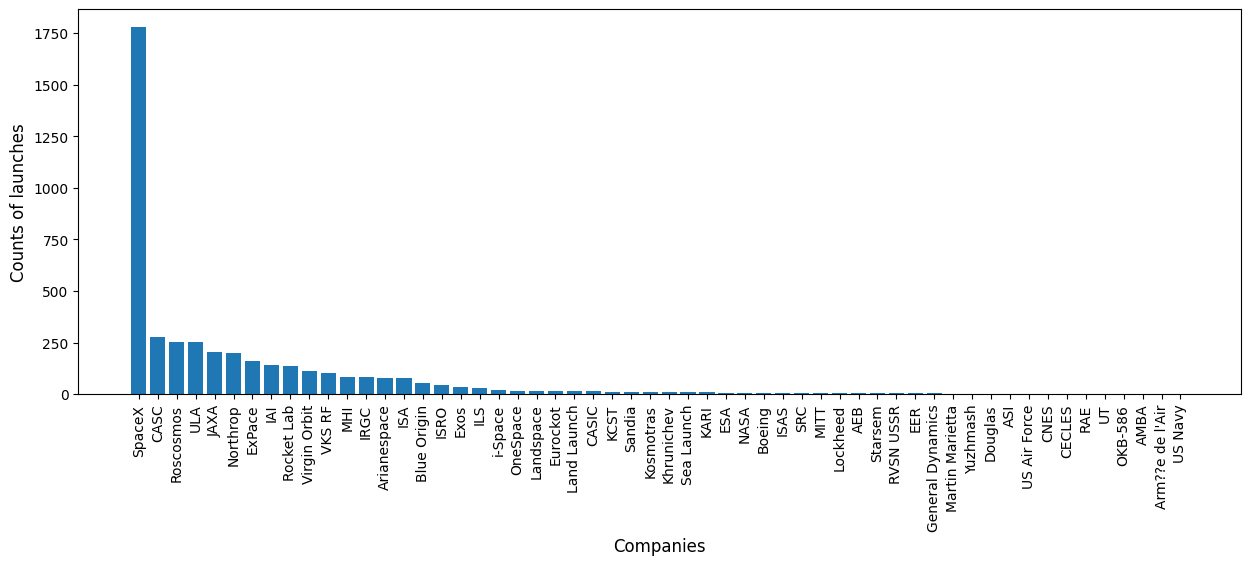

In [190]:
plt.figure(figsize=(15, 5))
plt.bar(companies, lauches_by_companie)
plt.xticks(rotation=90)
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.xlabel('Companies', fontsize=12)
plt.ylabel('Counts of launches', fontsize=12)

# Number of Active versus Retired Rockets


<Axes: xlabel='Rocket_Status', ylabel='count'>

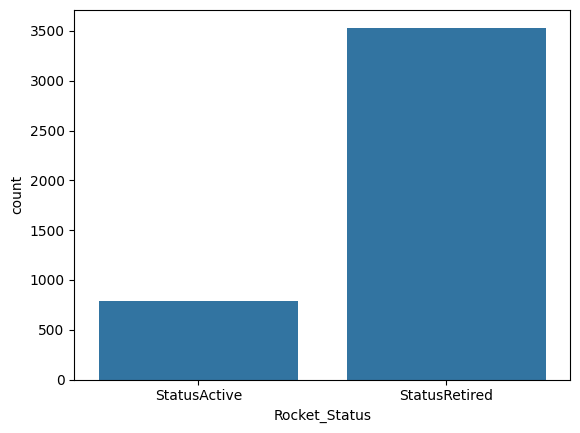

In [191]:
sns.countplot(x='Rocket_Status', data=df_data)

# Distribution of Mission Status

In [192]:
df_data['Mission_Status'].value_counts()

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

<Axes: xlabel='Mission_Status', ylabel='count'>

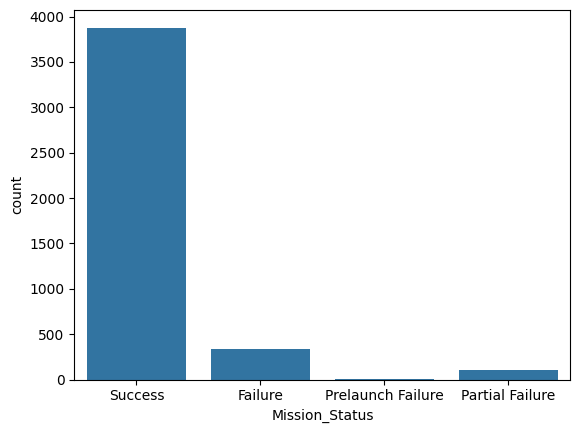

In [193]:
sns.countplot(x='Mission_Status', data=df_data)

# How Expensive are the Launches? 


In [194]:
clean_df_price = df_data.loc[df_data['Price'].isna() == False]

In [195]:
prices = clean_df_price['Price'].unique()
counts = clean_df_price['Price'].value_counts()

Text(0, 0.5, 'Counts')

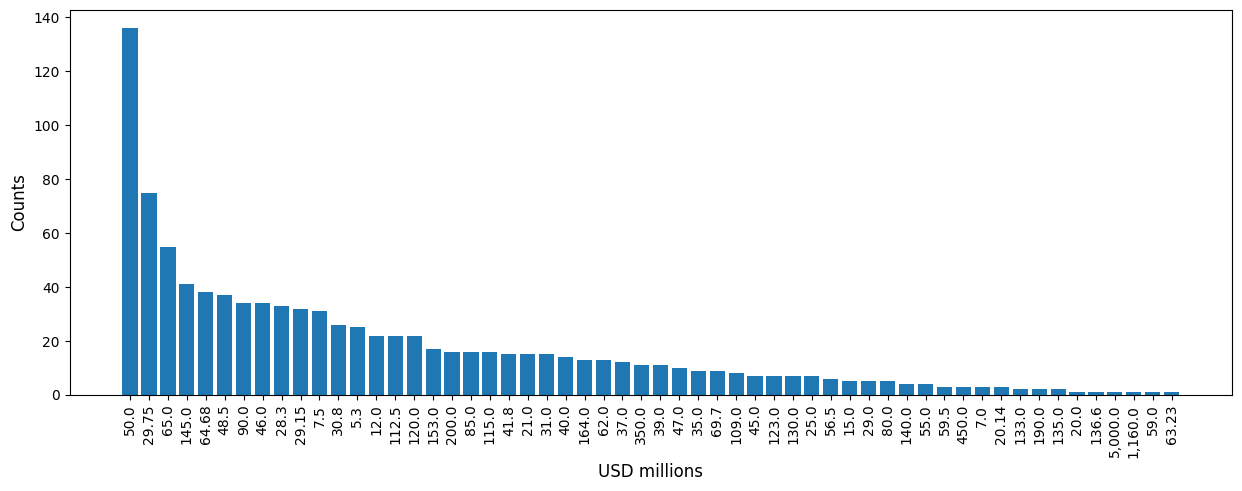

In [196]:
plt.figure(figsize=(15, 5))
plt.bar(prices, counts)
plt.xticks(rotation=90)
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.xlabel('USD millions', fontsize=12)
plt.ylabel('Counts', fontsize=12)

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [197]:
df_data['Country'] = df_data['Location'].apply(lambda location: location.split(',')[-1].strip())
df_data['Country'].unique()

array(['USA', 'China', 'Kazakhstan', 'Japan', 'Israel', 'New Zealand',
       'Russia', 'Shahrud Missile Test Site', 'France', 'Iran', 'India',
       'New Mexico', 'Yellow Sea', 'North Korea',
       'Pacific Missile Range Facility', 'Pacific Ocean', 'South Korea',
       'Barents Sea', 'Brazil', 'Gran Canaria', 'Kenya', 'Australia'],
      dtype=object)

In [198]:
correction = {'New Mexico': 'USA',
              'Yellow Sea': 'China',
              'Shahrud Missile Test Site': 'Iran',
              'Pacific Missile Range Facility': 'USA',
              'Barents Sea': 'Russian Federation',
              'Gran Canaria': 'USA',
              'Russia': 'Russian Federation',
              }
df_countries = df_data.replace(correction)
df_countries = df_countries.loc[df_countries['Country'] != 'Pacific Ocean']



In [199]:
alpha3_codes = []
for country in df_countries['Country']:
    alpha3_codes.append(pycountry.countries.search_fuzzy(country)[0].alpha_3)

df_countries['Alpha3'] = alpha3_codes

In [200]:
df_countries.head()

Organisation                                           Location  \
0       SpaceX         LC-39A, Kennedy Space Center, Florida, USA   
1         CASC  Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...   
2       SpaceX                      Pad A, Boca Chica, Texas, USA   
3    Roscosmos       Site 200/39, Baikonur Cosmodrome, Kazakhstan   
4          ULA           SLC-41, Cape Canaveral AFS, Florida, USA   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   
1  Thu Aug 06, 2020 04:01 UTC           Long March 2D | Gaofen-9 04 & Q-SAT   
2  Tue Aug 04, 2020 23:57 UTC            Starship Prototype | 150 Meter Hop   
3  Thu Jul 30, 2020 21:25 UTC  Proton-M/Briz-M | Ekspress-80 & Ekspress-103   
4  Thu Jul 30, 2020 11:50 UTC                    Atlas V 541 | Perseverance   

  Rocket_Status  Price Mission_Status     Country Alpha3  
0  StatusActive   50.0        Success         USA    USA  
1  StatusActive  29.75        Success       China    CHN  
2  StatusActive    NaN        Success         USA    USA  
3  StatusActive   65.0        Success  Kazakhstan    KAZ  
4  StatusActive  145.0        Success         USA    USA

In [201]:
# World geojson for more performace
response = requests.get(url='https://raw.githubusercontent.com/johan/world.geo.json/master/countries.geo.json')
if response.status_code == 200:
    geojson = response.json()

In [202]:
df_countries['number_of_launches_by_country'] = df_countries['Alpha3'].map(df_countries['Alpha3'].value_counts())

In [209]:
fig = px.choropleth(df_countries,                   
                    color=df_countries['number_of_launches_by_country'],
                    locations=df_countries['Alpha3'],                  
                    projection='natural earth',
                    hover_name=df_countries['Country'],
                    geojson=geojson,
                    labels={'number_of_launches_by_country': 'launches by country'}
                    )
fig.update_layout(height=500, margin={'r':0,'t':1,'l':0,'b':1})
fig.show()


<img src="../images/choro1.jpg">

# Use a Choropleth Map to Show the Number of Failures by Country


In [204]:
df_countries['number_failures_by_country'] = df_countries['Alpha3'].map(df_countries.loc[df_countries['Mission_Status'] == 'Failure']['Alpha3'].value_counts())
df_countries.head(1)


Organisation                                    Location  \
0       SpaceX  LC-39A, Kennedy Space Center, Florida, USA   

                         Date                                        Detail  \
0  Fri Aug 07, 2020 05:12 UTC  Falcon 9 Block 5 | Starlink V1 L9 & BlackSky   

  Rocket_Status Price Mission_Status Country Alpha3  \
0  StatusActive  50.0        Success     USA    USA   

   number_of_launches_by_country  number_failures_by_country  
0                           1351                      129.00

In [205]:
fig = px.choropleth(df_countries,                   
                    color=df_countries['number_failures_by_country'],
                    locations=df_countries['Alpha3'],                  
                    projection='natural earth',
                    hover_name=df_countries['Country'],
                    geojson=geojson,
                    labels={'number_failures_by_country': 'failures by country'}
                    )
fig.update_layout(height=500, margin={'r':0,'t':1,'l':0,'b':1})
fig.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [206]:
fig = px.sunburst(data_frame=df_countries,path=['Country'])
fig.update_layout(height=500,
                  margin={'r':0,'t':60,'l':0,'b':10})
fig.show()

In [207]:
fig = px.sunburst(data_frame=df_countries,path=['Mission_Status'])
fig.update_layout(height=500,
                  margin={'r':0,'t':60,'l':0,'b':10},)
fig.show()

In [208]:
fig = px.sunburst(data_frame=df_countries,path=['Organisation'])
fig.update_layout(height=500,
                  margin={'r':0,'t':60,'l':0,'b':10},)
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

# Analyse the Amount of Money Spent by Organisation per Launch

# Chart the Number of Launches per Year

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

## Chart the Total Number of Mission Failures Year on Year.

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 